# 🎓 Understanding Stochastic Gradient Descent for Phishing Email Classification 📧📉

### What is a Stochastic Gradient Descent (SGD) Classifier? 🤔
The **Stochastic Gradient Descent (SGD) Classifier** is a type of **linear classifier** that is used for both **binary** and **multi-class classification** tasks. It’s called **stochastic** because it updates the model’s parameters using only a **single data point** at each iteration, rather than the entire dataset, making it computationally efficient for large-scale data. 📊 

---

### How SGD Classifier Works 🛠️

1. **Randomly selects one data point**:
- The SGD Classifier is a linear model trained using **Stochastic Gradient Descent**, which updates the model’s weights using **one data point** (or a small batch) at a time. In contrast, **Logistic Regression** typically uses **Batch Gradient Descent**, which calculates the gradient using the **entire dataset** before updating the weights. 

2. **Loss Function**:
   -  SGD Classfier can apply different loss functions, but here it uses **hinge loss**, which is a loss function for **Support Vector Machines (SVM)**.

$$
L = \max(0, 1 - y \cdot f(x))
$$
#### Breakdown of the Formula:
- **`L`**: Hinge loss value.
- **`y`**: The **true class label**, typically **+1** for the **positive class** (e.g., non-spam) and **-1** for the **negative class** (e.g., spam).
- **`f(x)`**: The **predicted value**, which is a linear combination of the input features and weights.

If y is +1 (positive class) and f(x) is a positive value that is greater than or equal to 1, then the hinge loss will be 0 because the model has predicted correctly with a good margin.

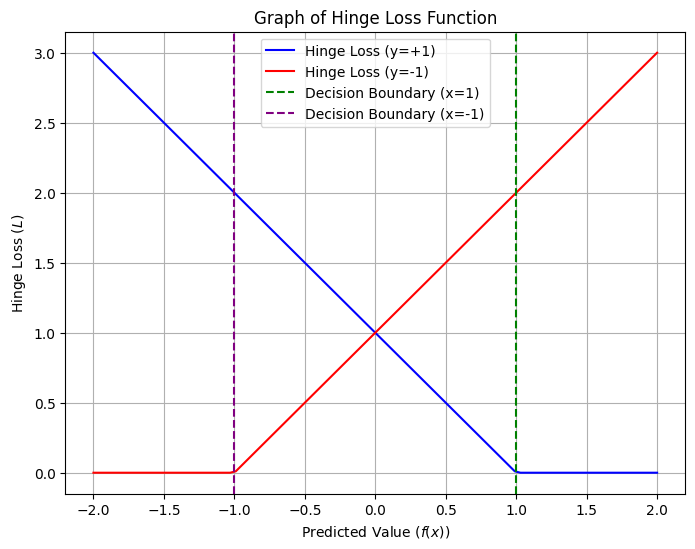

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define the hinge loss function
def hinge_loss(y, f_x):
    return np.maximum(0, 1 - y * f_x)

# Generate sample data for plotting
f_x = np.linspace(-2, 2, 100)  # Predicted values from -2 to 2
y_positive = 1  # Positive class (+1)
y_negative = -1  # Negative class (-1)

# Calculate hinge loss for positive and negative classes
hinge_loss_positive = hinge_loss(y_positive, f_x)
hinge_loss_negative = hinge_loss(y_negative, f_x)

# Create the plot
plt.figure(figsize=(8, 6))

# Plot hinge loss for positive class
plt.plot(f_x, hinge_loss_positive, label='Hinge Loss (y=+1)', color='blue')
# Plot hinge loss for negative class
plt.plot(f_x, hinge_loss_negative, label='Hinge Loss (y=-1)', color='red')
# Plot the decision boundary
plt.axvline(x=1, color='green', linestyle='--', label='Decision Boundary (x=1)')
plt.axvline(x=-1, color='purple', linestyle='--', label='Decision Boundary (x=-1)')

# Add labels and legend
plt.xlabel("Predicted Value ($f(x)$)")
plt.ylabel("Hinge Loss ($L$)")
plt.title("Graph of Hinge Loss Function")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


### Advantages of SGD for Phishing Email Classification 📧✨

- **Scalable**: Handles large datasets efficiently due to its incremental nature, making it suitable for real-time and large-scale phishing detection.
- **Supports Different Loss Functions**: Can be used with various loss functions, making it adaptable for different types of linear models.
- **Fast Convergence**: Stochastic updates often converge faster compared to traditional batch gradient descent.

---

### Potential Limitations:
- **Not Suitable for Complex Relationships**: SGD works well for linear separable data but might struggle with complex patterns in text unless more sophisticated features are used.


### Implementation 🔍
1. **Loading the required libraries** 📚

In [2]:
from sklearn.linear_model import SGDClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
import pandas as pd

2. **Loading and splitting the Data** 📥

In [3]:
# Load the save TF-IDF features and labels
x_data = np.load('../feature_x.npy')
y_data = np.load('../y_tf.npy')

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.8, random_state=0)

3. **Model Initialization** 🤖

The **`SGDClassifier()`** is initialized with its **default parameters** in Scikit-learn. This classifier uses **Stochastic Gradient Descent** to train linear models for classification tasks.

- **`loss="hinge"`**: The default loss function is the **Hinge Loss**, which is commonly used for linear Support Vector Machines (SVM). It aims to create a large margin between the two classes.
  
- **`penalty="l2"`**: By default, the model applies an **L2 regularization** penalty to prevent overfitting by keeping the model weights small. This regularization term helps control model complexity.

- **`alpha=0.0001`**: This parameter controls the **regularization strength**. A lower value means less regularization, while a higher value increases regularization, making the model simpler.

- **`max_iter=1000`**: The maximum number of iterations the algorithm will run for before stopping. It helps control training time, especially when dealing with large datasets.

- **`tol=1e-3`**: The stopping criterion for the optimization process. The training will halt if the change in loss is smaller than this value, ensuring convergence.

- **`learning_rate="optimal"`**: The model uses an **adaptive learning rate** that adjusts automatically based on the number of iterations. This helps achieve faster convergence.

- **`random_state=None`**: By default, the model does not use a fixed random seed, making the results non-reproducible. Setting a value for `random_state` will ensure consistent results across runs.

In [4]:
sgd = SGDClassifier() 

4. **Training the Model** 🏋️‍♂️

In [5]:
sgd.fit(x_train,y_train)

SGDClassifier()

5. **Making Predictions** 🔮

In [6]:
prediction = sgd.predict(x_test)

6. **Evaluating the Model** 🧮

In [7]:
accuracy = accuracy_score(y_test, prediction) * 100
f1 = f1_score(y_test, prediction) * 100
classification_rep = classification_report(y_test, prediction)

# Print the results to console 
print(f"accuracy: {accuracy:.5f} %")
print(f"f1 score: {f1:.5f} %")
print("classification report:\n", classification_rep)

# Dictionary to hold the results
results = {
    'Model': 'SGD Classifier',
    'Accuracy (%)': accuracy,
    'F1 Score (%)': f1
}

# Convert to DataFrame and append to CSV file
df = pd.DataFrame([results]) 
df.to_csv('../model_accuracies.csv', mode='a', header=not pd.io.common.file_exists('../model_accuracies.csv'), index=False)

accuracy: 98.54618 %
f1 score: 98.81533 %
classification report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1351
           1       0.99      0.99      0.99      2157

    accuracy                           0.99      3508
   macro avg       0.98      0.99      0.98      3508
weighted avg       0.99      0.99      0.99      3508

